In [1]:
import datetime as dt
from sttn.data.nyc import Service311RequestsDataProvider

provider = Service311RequestsDataProvider()
network = provider.get_data(dt.datetime(2020, 1, 1), dt.datetime(2020, 12, 31))

In [26]:
network.shape()

(236, 2410730)

<AxesSubplot:xlabel='time'>

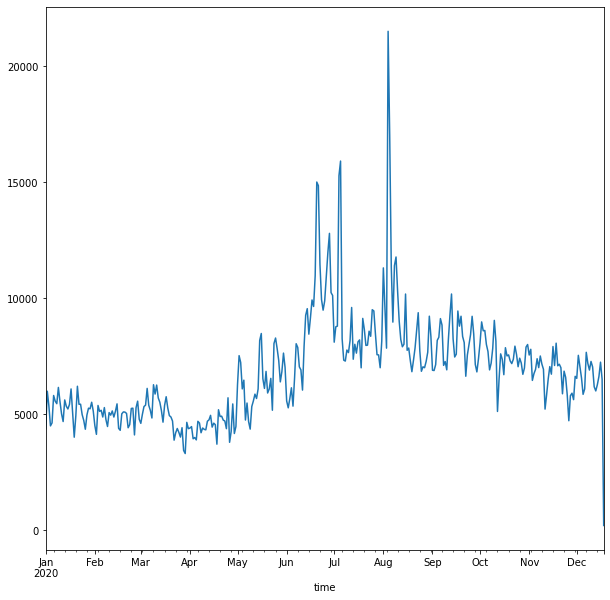

In [14]:
network.edges_df.resample('1d', on='time').time.count().plot(figsize=(10,10))

In [2]:
aggregated = network.agg_parallel_edges(column_aggs={'time': 'count'}, key='complaint_type')
aggregated.edges_df = aggregated.edges_df.rename(columns={'time':'count'})
aggregated.shape()

(236, 20624)

<AxesSubplot:>

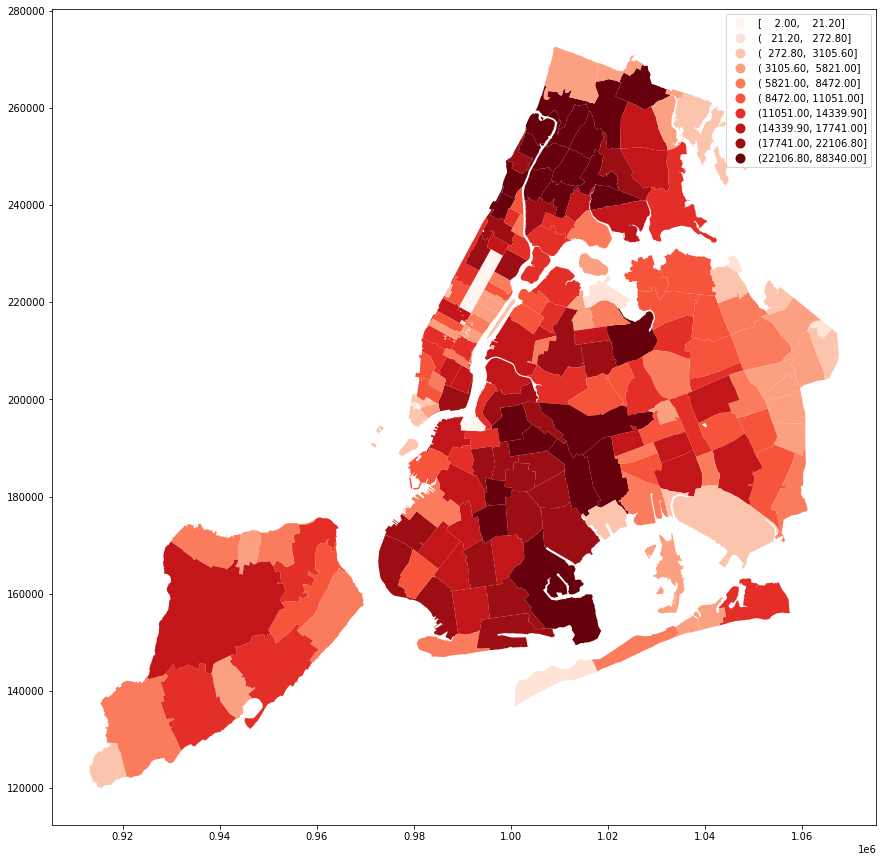

In [4]:
all_complaints = aggregated.agg_adjacent_edges(aggs = {'count': 'sum'})
with_counts = aggregated.join_node_labels(all_complaints)
with_counts.plot(figsize=(15,15), column='count', cmap="Reds", scheme='quantiles', k=10, legend=True)